# **Diabetes** **Prediction**
#**Devika E S**






#### The Diabetes prediction dataset comprises medical and demographic information from patients, including whether they have diabetes. The dataset features variables such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c levels, and blood glucose levels. This data can be utilized to develop machine learning models that predict the likelihood of diabetes in patients based on their medical history and demographic characteristics.



---



##**Importing Libraries**

####   NumPy: Library for numerical operations and array manipulations.
####    Pandas: Library for data manipulation and analysis, especially for tabular data.


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

##**Loading the Dataset**
####This line reads the dataset from the specified CSV file and loads it into a Pandas DataFrame named df.

In [ ]:
df=pd.read_csv("/content/diabetes_prediction_dataset.csv")

In [ ]:
# Display the first few rows of the dataset
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


####This command is typically used to get a quick overview of the dataset's structure and content.It shows the first 5 rows of the DataFrame by default.

In [ ]:
df.shape # returns a tuple containing the number of rows and columns in the DataFrame

(100000, 9)

####It provides the number of rows and columns in the dataset, showing the dimensions of the diabetes dataset.

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


#### Generates descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset’s distribution, excluding NaN values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


####Provides a concise summary of the DataFrame, including non-null counts for each column,memory usage of the DataFrame,the index dtype and column dtypes

## **Checking for Missing Values**
####This line calculates the total number of missing (NaN) values in each column of the DataFrame df.

In [ ]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

##**Checking for Duplicate Rows**
#### This line counts the number of duplicate rows in the DataFrame df

In [ ]:
df.duplicated().sum()

3854

##**Removing Duplicate Rows**
####This line removes all duplicate rows from the DataFrame df. This helps in ensuring that each record in the dataset is unique, which is crucial for accurate analysis and modeling.

In [ ]:
df = df.drop_duplicates()
df.duplicated().sum()#verifying removal of duplicate rows indicating that all duplicates have been successfully removed.

0

## **Importing Visualization and Machine Learning Libraries**

In [ ]:
import matplotlib.pyplot as plt #provides functions for creating plots and visualizations in Python.
import seaborn as sns#used for statistical data visualization
from sklearn.model_selection import train_test_split#used to split datasets into training and testing sets for machine learning model training and evaluation.

<BarContainer object of 3 artists>

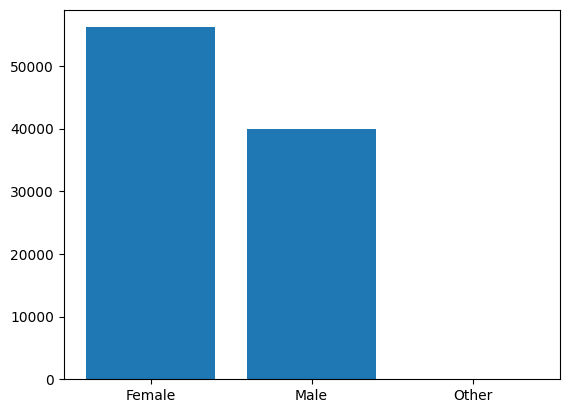

In [ ]:
#Visualizing Gender Distribution
gender_count = df['gender'].value_counts()
plt.bar(gender_count.index, gender_count.values)

####This code calculates and visualizes the distribution of genders in the diabetes dataset using a **bar plot**, displaying the count of each gender category.

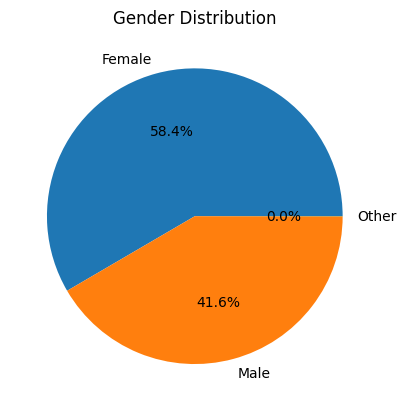

In [ ]:
#pie chart
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

####This code creates a **pie chart** showing the gender distribution in the diabetes dataset, with percentage labels for each gender category.

<Axes: ylabel='Frequency'>

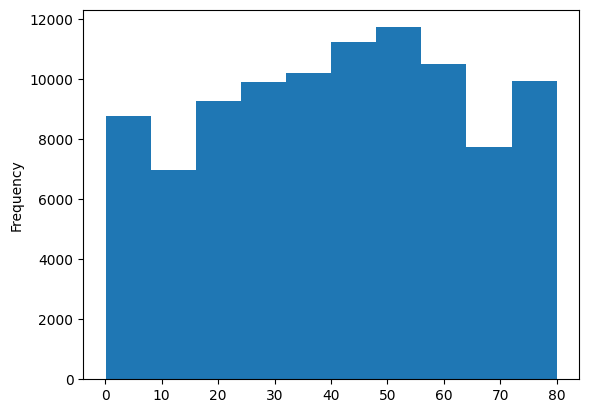

In [ ]:
df.age.plot(kind='hist')

#### Creating a **histogram** to visualize the distribution of ages in the DataFrame

###Visualizing Age Distribution Using **Kernel Density Estimation** (KDE) Plot

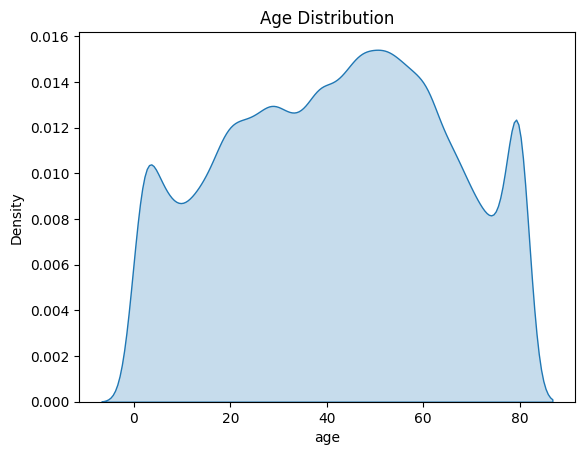

In [ ]:
sns.kdeplot(df['age'], fill=True)
plt.title('Age Distribution')
plt.show()

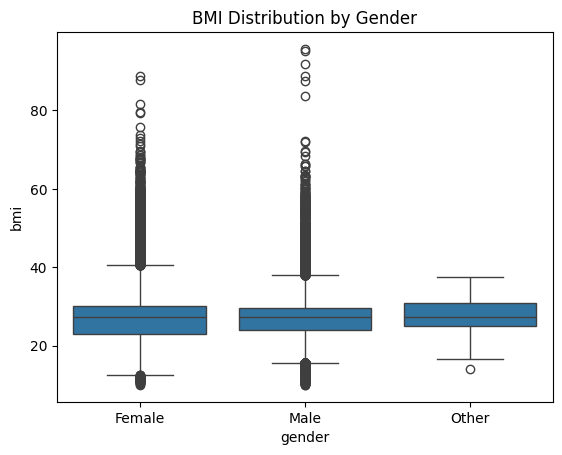

In [ ]:
#Boxplots: BMI
sns.boxplot(x='gender', y='bmi', data=df)
plt.title('BMI Distribution by Gender')
plt.show()

####The BMI distribution by gender helps to understand differences in BMI values across different genders, highlighting any potential disparities.

##**Encoding Categorical Variables**
####This code snippet uses **LabelEncoder** from scikit-learn (sklearn.preprocessing) to transform categorical variables ('gender' and 'smoking_history' columns) into numerical representations.

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['smoking_history'] = encoder.fit_transform(df['smoking_history'])

In [ ]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


####It generates a **heatmap** using seaborn to visualize the correlation matrix between all numerical features in the diabetes dataset, with correlation values displayed.

## **Data Preprocessing**
#### **Splitting**: The data was split into training (80%) and testing (20%) sets.


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
X = df[['age', 'bmi', 'blood_glucose_level', 'HbA1c_level', 'hypertension']]
y = df['diabetes']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


####**Scaling**: StandardScaler was applied to normalize the feature values.

In [ ]:
# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

####This code standardizes the feature variables in the training and test sets using StandardScaler, ensuring all features are on the same scale for machine learning model training.

<Axes: >

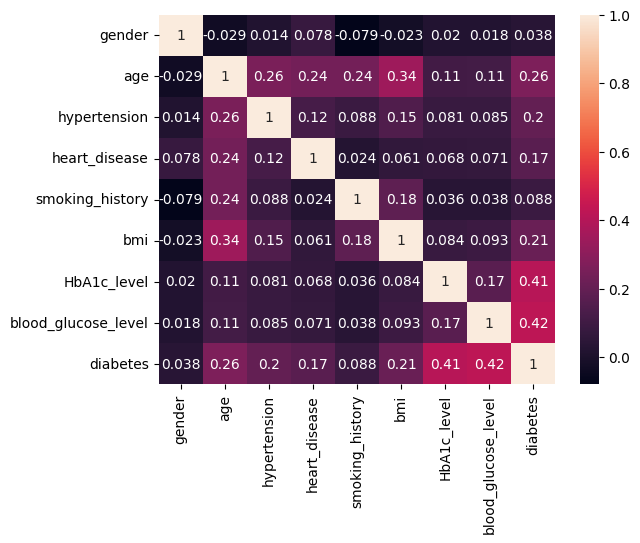

In [ ]:
sns.heatmap(df.corr(), annot=True)#create a heatmap that visualizes the correlation matrix of the DataFrame



---



# 1. **LOGISTIC REGRESSION**



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

##**Hyperparameter tuning**


In [ ]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Regularization parameter values
    'penalty': ['l1', 'l2'],# Penalty norm used in the logistic regression
    'solver': ['liblinear', 'saga']# Optimization algorithm
}

####This parameter grid defines a set of hyperparameters that will be used in a grid search to find the best combination for training a logistic regression model. The grid specifies different values for the regularization parameter (C), penalty norm (penalty), and optimization algorithm (solver). Each combination of these parameters will be evaluated during the grid search to determine which combination yields the best performance for the model.

#### Create a logistic regression object

In [ ]:
log_reg = LogisticRegression(random_state=42, max_iter=1000)

##Setting Up **GridSearchCV** for Model Tuning

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

####GridSearchCV performs an exhaustive search over specified hyperparameters for logistic regression, using 5-fold cross-validation to find the best model configuration for diabetes prediction.

In [ ]:
# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

##Printing **Best Parameters** and **Cross-Validation Score**

In [ ]:
# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation score: 0.9587862252057526


##Use the **best model** to make predictions

In [ ]:
best_model = grid_search.best_estimator_

## **Feature Importance**
####This heading summarizes the code snippet that calculates and displays the importance of each feature in a trained logistic regression model (best_model).

In [ ]:
# Print feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(best_model.coef_[0])
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
               Feature  Importance
3          HbA1c_level    2.204419
2  blood_glucose_level    1.253629
0                  age    0.975621
1                  bmi    0.525082
4         hypertension    0.197674


####Visualizing Feature Importance in Logistic Regression Model

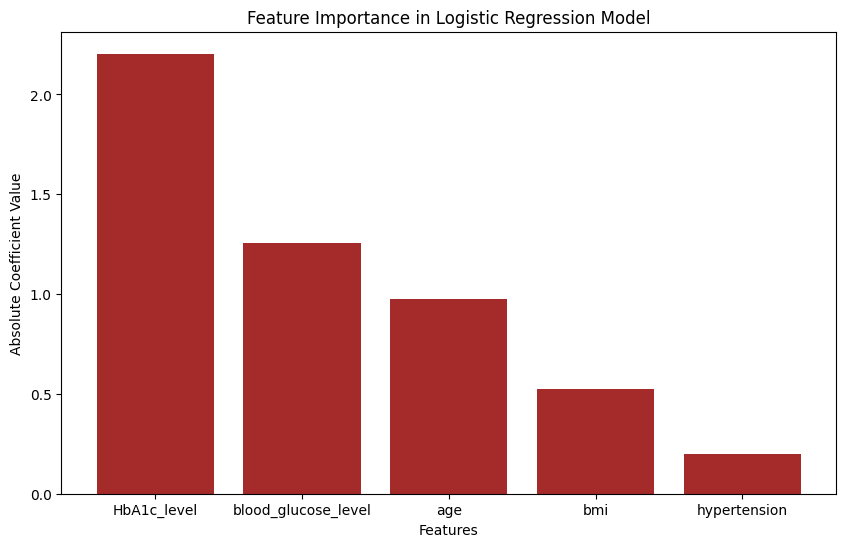

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'],color='brown')
plt.title('Feature Importance in Logistic Regression Model')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.show()

####This code creates a bar plot displaying the importance of different features in the logistic regression model for diabetes prediction, based on their coefficient magnitudes.

##**Making Predictions and Calculating Accuracy on Training Data and Testing Data**

In [ ]:
# Make predictions on training data
y_train_pred = best_model.predict(X_train_scaled)
# Calculate accuracy on training data
train_accuracy = accuracy_score(y_train, y_train_pred)

In [ ]:
# Make predictions on test data
y_test_pred = best_model.predict(X_test_scaled)
# Calculate accuracy on test data
test_accuracy1 = accuracy_score(y_test, y_test_pred)

In [ ]:
print(f"\nAccuracy on training set: {train_accuracy:.4f}")
print(f"Accuracy on test set: {test_accuracy1:.4f}")


Accuracy on training set: 0.9586
Accuracy on test set: 0.9598


##**Printing Classification Report**
####The classification report includes metrics such as precision, recall, F1-score, and support for each class, providing a comprehensive evaluation of the model's performance on the test data.

In [ ]:
print("\nClassification Report :")
print(classification_report(y_test, y_test_pred))


Classification Report :
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17562
           1       0.88      0.62      0.73      1668

    accuracy                           0.96     19230
   macro avg       0.92      0.81      0.85     19230
weighted avg       0.96      0.96      0.96     19230



In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix:
[[17422   140]
 [  634  1034]]


####Compute and display the **confusion matrix** for the diabetes prediction model, showing the counts of true positives, false positives, true negatives, and false negatives.

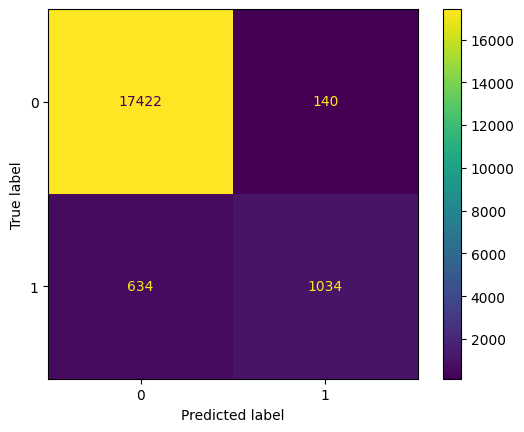

In [ ]:
cm = confusion_matrix(y_test,y_test_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

####This code creates and displays a visual representation of the confusion matrix for the diabetes prediction model, offering a graphical view of the model's performance.

# 2.**SUPPORT VECTOR CLASSIFIER**

####Installing the scikit-learn-intelex package, which provides Intel-optimized versions of scikit-learn algorithms for potentially faster machine learning computations on compatible hardware.

In [ ]:
pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.3/151.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 MB 7.7 MB/s eta 0:00:00


In [ ]:
from sklearnex import patch_sklearn
patch_sklearn()#Patching is often used to modify or extend the functionality of existing libraries without changing their source code.
from sklearn.svm import SVC

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


####This code enables Intel-optimized scikit-learn algorithms and imports the SVC (Support Vector Classification) model for potential performance improvements in diabetes prediction.

##Creating and Training the Support Vector Classifier (SVC) Model

In [ ]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train_scaled, y_train)

SVC(random_state=42)

###Make predictions

In [ ]:
y_train_pred = svc_model.predict(X_train_scaled)
y_test_pred = svc_model.predict(X_test_scaled)

### Calculate accuracies

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy2 = accuracy_score(y_test, y_test_pred)

##Printing Training and Testing Accuracy

In [ ]:
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy2:.4f}")

Training Accuracy: 0.9642
Test Accuracy: 0.9657


##Classification report
####These lines generate and display a comprehensive classification report for the diabetes prediction model, including precision, recall, F1-score, and support for each class.

In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17562
           1       0.99      0.61      0.76      1668

    accuracy                           0.97     19230
   macro avg       0.98      0.81      0.87     19230
weighted avg       0.97      0.97      0.96     19230



##Printing Confusion Matrix
####The confusion matrix provides a summary of correct and incorrect predictions broken down by each class, offering insights into the model's performance in terms of true positives, true negatives, false positives, and false negatives.

In [ ]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix:
[[17550    12]
 [  648  1020]]


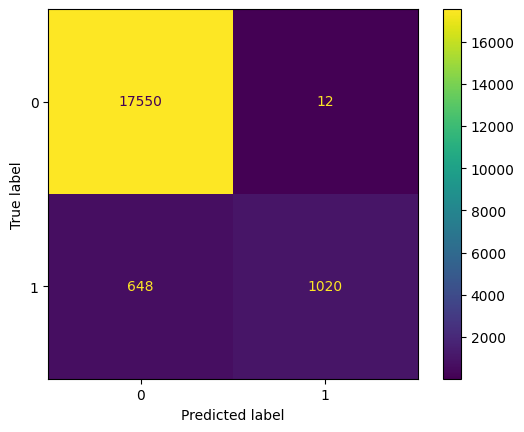

In [ ]:
cm = confusion_matrix(y_test,y_test_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()



---



# 3. **DECISION TREE CLASSIFIER**

####This code imports the DecisionTreeClassifier for building a decision tree model and the plot_tree function for visualizing the resulting tree in diabetes prediction.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

##Defining the **Parameter Grid** for Decision Tree Classifier


In [ ]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],# Maximum depth of the tree
    'min_samples_split': [2, 5, 10],# Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],# Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']# Function to measure the quality of a split
}

####The parameters for tuning a Decision Tree Classifier—max_depth, min_samples_split, min_samples_leaf, and criterion—control the tree's depth to prevent overfitting, set the minimum samples required to split nodes, ensure leaf nodes have enough samples for reliable predictions, and determine the split quality metric (either 'gini' for Gini impurity or 'entropy' for information gain).

In [ ]:
# This line creates an instance of a Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)#Setting a specific random state (in this case, 42) ensures reproducibility of results.

##Setting Up Grid Search for Decision Tree Classifier

In [ ]:
# Set up GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [ ]:
# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

###Print the best parameters and score

In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best cross-validation score: 0.9705262931312936


In [ ]:
# Use the best model
best_model = grid_search.best_estimator_

In [ ]:
# Make predictions on training data
y_train_pred = best_model.predict(X_train_scaled)
# Calculate accuracy on training data
train_accuracy = accuracy_score(y_train, y_train_pred)

In [ ]:
# Make predictions on test data
y_test_pred = best_model.predict(X_test_scaled)
# Calculate accuracy on test data
test_accuracy3 = accuracy_score(y_test, y_test_pred)

##Printing Training and Testing Accuracy

In [ ]:
print(f"\nAccuracy on training set: {train_accuracy:.4f}")
print(f"Accuracy on test set: {test_accuracy3:.4f}")


Accuracy on training set: 0.9707
Accuracy on test set: 0.9720


##**Classification Report**

In [ ]:
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     17562
           1       1.00      0.68      0.81      1668

    accuracy                           0.97     19230
   macro avg       0.98      0.84      0.90     19230
weighted avg       0.97      0.97      0.97     19230



##**Confusion Matrix**

In [ ]:
print("\nConfusion Matrix (Test Set):")
print(confusion_matrix(y_test, y_test_pred))


Confusion Matrix (Test Set):
[[17559     3]
 [  535  1133]]


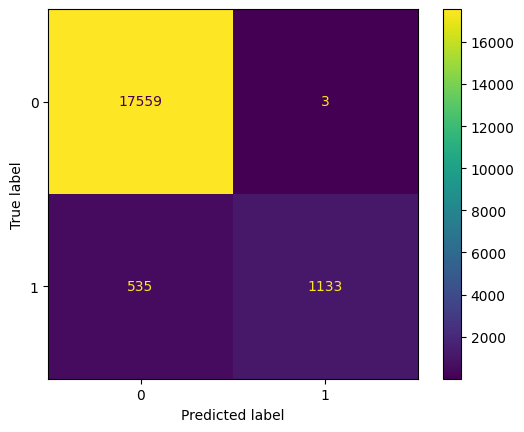

In [ ]:
cm = confusion_matrix(y_test,y_test_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

####This code creates and displays a visual confusion matrix for the diabetes prediction model, with the actual matrix values showing 17559 true negatives, 3 false positives, 535 false negatives, and 1133 true positives.

##**Calculating and Sorting Feature Importance**

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

In [ ]:
print("\nFeature Importance:")
print(feature_importance)


Feature Importance:
               Feature  Importance
3          HbA1c_level    0.574651
2  blood_glucose_level    0.327751
0                  age    0.066711
1                  bmi    0.025787
4         hypertension    0.005100


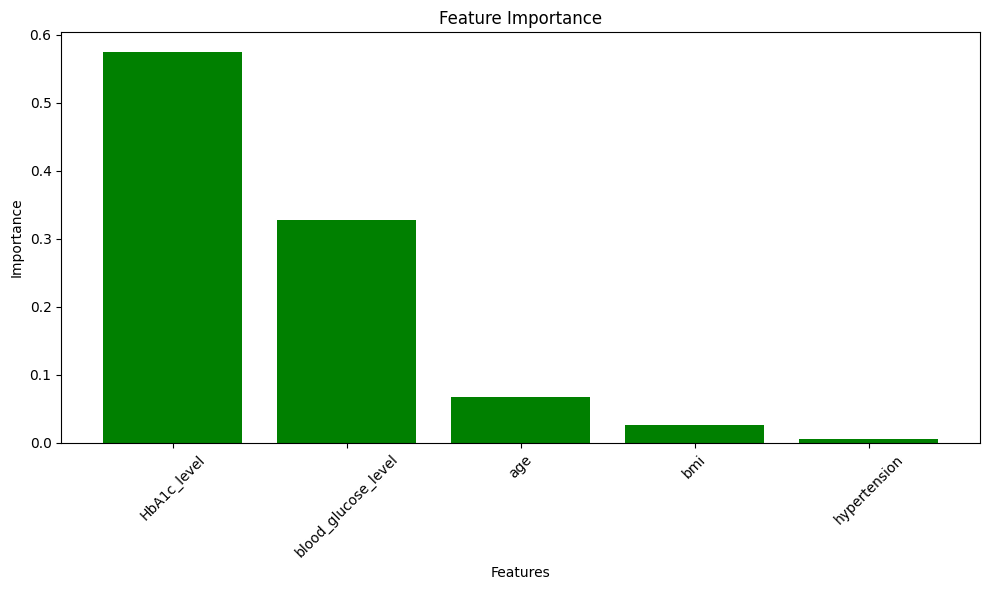

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'],color='green')
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

####This code creates a bar plot of feature importance for the diabetes prediction model, with green bars, rotated x-axis labels, and adjusted layout for better readability.

##**Visualizing Decision Tree**
####This code snippet visualizes a decision tree classifier (best_model) with a maximum depth of 3 for clarity. It uses plot_tree from scikit-learn (sklearn.tree) to generate a tree diagram, where each node represents a decision rule based on a feature, and each leaf node represents the predicted class ('No Diabetes' or 'Diabetes'). The plot is annotated with feature names (X.columns) and class names for better interpretation, with nodes and branches filled and rounded for clarity.

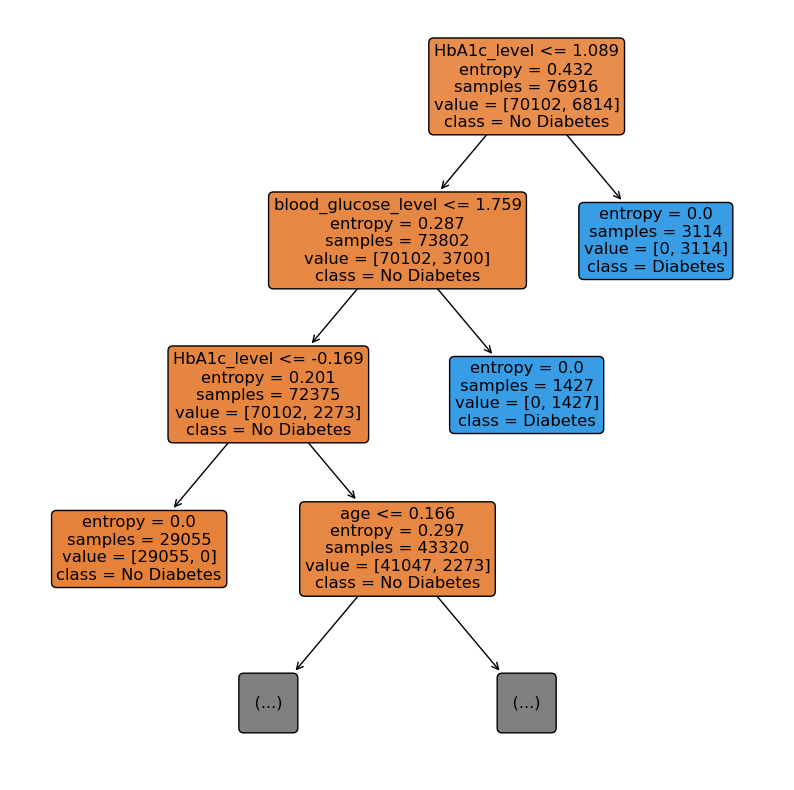

In [ ]:
# Visualize the tree (limit depth for clarity)
plt.figure(figsize=(10,10))
plot_tree(best_model, max_depth=3, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True)
plt.show()


####This code visualizes the top three levels of the decision tree model for diabetes prediction, using colored nodes and displaying feature names and class labels for interpretability.

##**Comparing 3 Models**

In [ ]:
# Print the headers
print(f"{'Model':<30}{'Accuracy':<15}")
# Print logistic regression values
print(f"{'Logistic Regression':<30}{test_accuracy1:<10.4f}")
# Print support vector classifier values
print(f"{'Support Vector Classifier':<30}{test_accuracy2:<10.4f}")
# Print decision tree values
print(f"{'Decision Tree Classifier':<30}{test_accuracy3:<10.4f}")

Model                         Accuracy       
Logistic Regression           0.9598    
Support Vector Classifier     0.9657    
Decision Tree Classifier      0.9720    


####The evaluation of the models reveals that the Decision Tree Classifier achieved the highest accuracy score of 0.9720, followed by the Support Vector Classifier with 0.9657, and the Logistic Regression model with 0.9598. These results demonstrate the Decision Tree Classifier's superior performance on this dataset, while the Support Vector Classifier and Logistic Regression models also show strong predictive accuracy